# Interactive Bounding Box Testing

Test and visualize bounding boxes from the synthetic dataset

In [ ]:
import json
import ast
from PIL import Image, ImageDraw, ImageFont
from datasets import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

## Load the dataset

In [ ]:
print("Loading dataset...")
dataset = load_dataset("PRAIG/JAZZMUS_Synthetic", split="train")
print(f"Dataset loaded. Total samples: {len(dataset)}")

Loading dataset...
Dataset loaded. Total samples: 326


## Select an image to test

In [ ]:
# Change this to test different images
IMAGE_IDX = 0

image = dataset[IMAGE_IDX]["image"]
annotation_data = dataset[IMAGE_IDX]["annotation"]

print(f"Image size: {image.size}")
print(f"Annotation type: {type(annotation_data)}")

Image size: (794, 1123)
Annotation type: <class 'str'>


In [ ]:
# Parse annotation
if isinstance(annotation_data, str):
    try:
        regions = json.loads(annotation_data)
    except json.JSONDecodeError:
        regions = ast.literal_eval(annotation_data)
else:
    regions = annotation_data

print(f"Number of systems: {len(regions['systems'])}")

Number of systems: 9


## Display original image

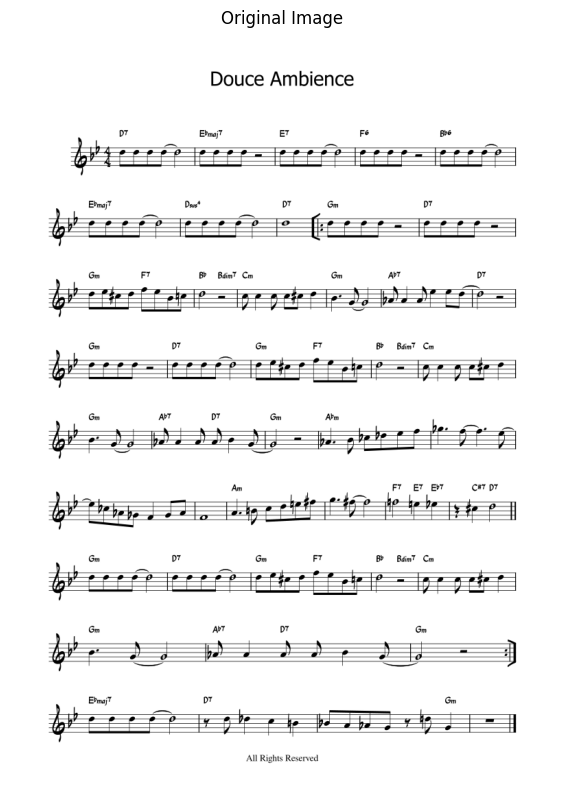

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

## Test bounding box - Manually adjust coordinates here!

In [ ]:
# Select which system to test
SYSTEM_IDX = 0

system = regions['systems'][SYSTEM_IDX]
bbox = system['bounding_box']

print(f"Original bbox from dataset:")
print(f"  fromX: {bbox['fromX']}")
print(f"  toX:   {bbox['toX']}")
print(f"  fromY: {bbox['fromY']}")
print(f"  toY:   {bbox['toY']}")
print(f"\nDimensions: {bbox['toX'] - bbox['fromX']} x {bbox['toY'] - bbox['fromY']}")

Original bbox from dataset:
  fromX: 121
  toX:   1558
  fromY: 187
  toY:   425

Dimensions: 1437 x 238


In [ ]:
# ADJUST THESE VALUES TO TEST DIFFERENT INTERPRETATIONS
# PIL crop format: (left, top, right, bottom)

# Option 1: Direct mapping
og_left = bbox['fromX']
og_top = bbox['fromY']
og_right = bbox['toX']
og_bottom = bbox['toY']

# Uncomment to test other interpretations:
# Option 2: X/Y swapped
# left = bbox['fromY']
# top = bbox['fromX']
# right = bbox['toY']
# bottom = bbox['toX']

# Option 3: Custom values (manually adjust)
left = og_left - 40
top = og_top - 60
right = og_right/2
bottom = og_bottom - 200

print(f"\noriginal coordinates: ({og_left}, {og_top}, {og_right}, {og_bottom})")
print(f"\nCrop coordinates: ({left}, {top}, {right}, {bottom})")


original coordinates: (121, 187, 1558, 425)

Crop coordinates: (81, 127, 779.0, 225)


## Visualize the bounding box on original image

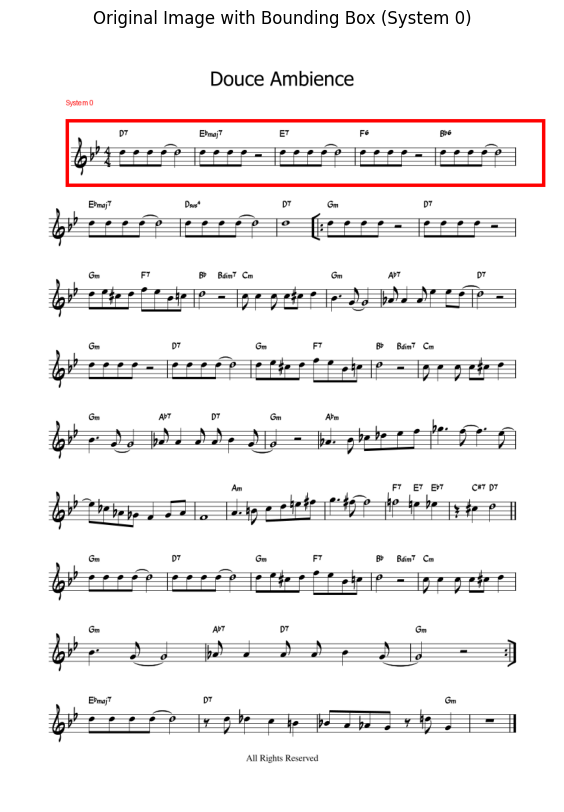

In [ ]:
# Draw rectangle on image
img_with_bbox = image.copy()
draw = ImageDraw.Draw(img_with_bbox)

# Draw the bounding box in red
draw.rectangle([(left, top), (right, bottom)], outline="red", width=5)

# Add label
draw.text((left, top - 30), f"System {SYSTEM_IDX}", fill="red")

plt.figure(figsize=(15, 10))
plt.imshow(img_with_bbox)
plt.title(f"Original Image with Bounding Box (System {SYSTEM_IDX})")
plt.axis('off')
plt.show()

## Crop and display the cropped region

Cropped image size: (698, 98)


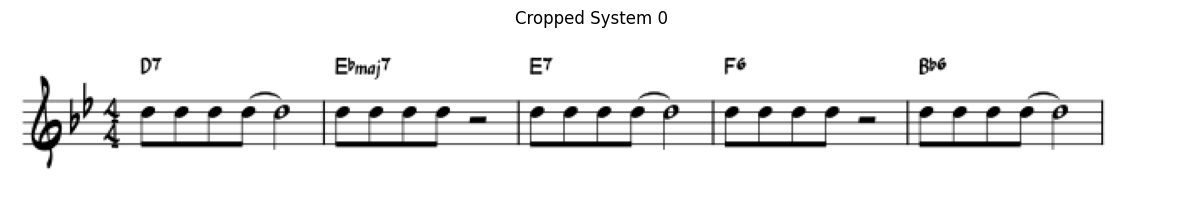

In [ ]:
# Crop the image
try:
    cropped = image.crop((left, top, right, bottom))
    print(f"Cropped image size: {cropped.size}")
    
    plt.figure(figsize=(15, 3))
    plt.imshow(cropped)
    plt.title(f"Cropped System {SYSTEM_IDX}")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"ERROR cropping: {e}")

## Display the **kern encoding for this system

In [ ]:
if "**kern" in system:
    kern_content = system["**kern"]
    print(f"**kern encoding for System {SYSTEM_IDX}:")
    print("="*60)
    print(kern_content)
    print("="*60)
else:
    print("No **kern encoding found!")

**kern encoding for System 0:
**kern	**mxhm
*I"P1	*
*clefG2	*
*k[b-e-]	*
*B-:	*
*M4/4	*
=	=
8ddL	D:7
8dd	.
8dd	.
[8ddJ	.
2dd]	.
=	=
8ddL	Eb:maj7
8dd	.
8dd	.
8ddJ	.
2r	.
=	=
8ddL	E:7
8dd	.
8dd	.
[8ddJ	.
2dd]	.
=	=
8ddL	F:maj6
8dd	.
8dd	.
8ddJ	.
2r	.
=	=
8ddL	Bb:maj6
8dd	.
8dd	.
[8ddJ	.
2dd]	.
!!linebreak:original
*-	*-



## Show all systems with their bounding boxes

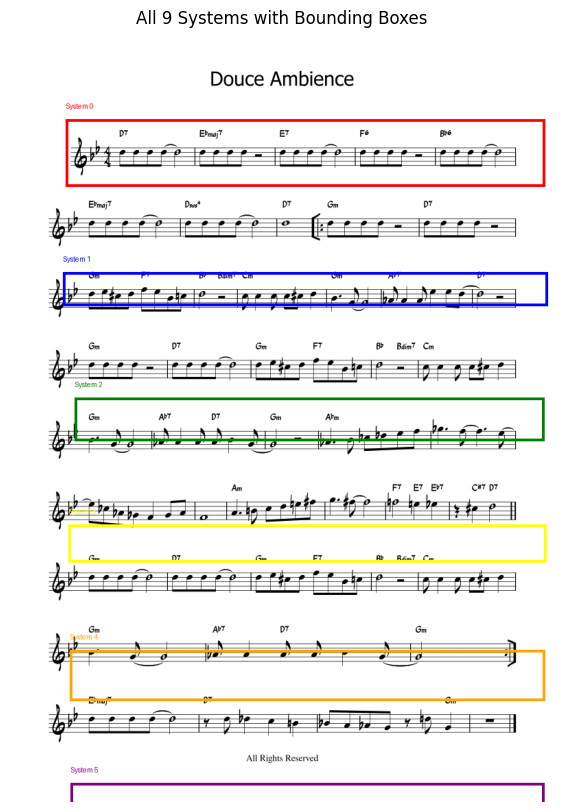

In [ ]:
# Draw all systems on one image
img_all_bbox = image.copy()
draw = ImageDraw.Draw(img_all_bbox)

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta']

def adjust_bbox_coordinates(x,y,toX,toY):
    x = x - 40
    y = y - 60
    toX = toX / 2
    toY = toY - 200
    return x, y, toX, toY

for i, system in enumerate(regions['systems']):
    if 'bounding_box' in system:
        b = system['bounding_box']
        color = colors[i % len(colors)]
        og_left, og_top, og_right, og_bottom = b['fromX'], b['fromY'], b['toX'], b['toY']
        left, top, right, bottom = adjust_bbox_coordinates(og_left, og_top, og_right, og_bottom)
        draw.rectangle(
            [(left, top), (right, bottom)],
            outline=color,
            width=4
        )
        draw.text((left, top - 25), f"System {i}", fill=color)

plt.figure(figsize=(15, 10))
plt.imshow(img_all_bbox)
plt.title(f"All {len(regions['systems'])} Systems with Bounding Boxes")
plt.axis('off')
plt.show()

## Summary of all systems

In [ ]:
print(f"Total systems: {len(regions['systems'])}\n")
for i, system in enumerate(regions['systems']):
    if 'bounding_box' in system:
        b = system['bounding_box']
        width = b['toX'] - b['fromX']
        height = b['toY'] - b['fromY']
        has_kern = '**kern' in system
        print(f"System {i}:")
        print(f"  bbox: ({b['fromX']}, {b['fromY']}) -> ({b['toX']}, {b['toY']})")
        print(f"  size: {width} x {height}")
        print(f"  has kern: {has_kern}")
        print()

Total systems: 9

System 0:
  bbox: (121, 187) -> (1558, 425)
  size: 1437 x 238
  has kern: True

System 1:
  bbox: (117, 410) -> (1566, 599)
  size: 1449 x 189
  has kern: True

System 2:
  bbox: (134, 593) -> (1556, 796)
  size: 1422 x 203
  has kern: True

System 3:
  bbox: (125, 778) -> (1562, 973)
  size: 1437 x 195
  has kern: True

System 4:
  bbox: (127, 961) -> (1558, 1175)
  size: 1431 x 214
  has kern: True

System 5:
  bbox: (128, 1155) -> (1556, 1336)
  size: 1428 x 181
  has kern: True

System 6:
  bbox: (134, 1324) -> (1552, 1535)
  size: 1418 x 211
  has kern: True

System 7:
  bbox: (136, 1518) -> (1548, 1713)
  size: 1412 x 195
  has kern: True

System 8:
  bbox: (146, 1702) -> (1545, 1906)
  size: 1399 x 204
  has kern: True

